# **<span style="color:white;">Exploratory Data Analysis</span>**

## **Purpose of Notebook**
Conducting a EDA analysis on the loaded and cleaned data, checking numerical stats, distributions, target analysis and geographical views

---

## **Contents of notebook**
### **Section 1: Loading and Merging Dataset**
```python 
- [x] Loading the datasets
- [x] Look at the shape of the cleaned dataframes
- [x] Split Columns based on Datatypes
```
### **Section 2: Assessing Missingness**
```python 
- [x] Percentage missingness per column
- [x] Does missingness correlate with severity
```
### **Section 3: EDA for Numerical Values**
```python 
- [x] Boxplots, Outliers and KDEs
```
### **Section 4: EDA for Catergorical Values**
```python 
- [x] Barplots and KDEs for top 10/20 values
```
### **Section 5: EDA for DateTime Values**
```python 
- [x] Radial Time plots (24hrs)
- [x] Day, Month, Date bar plots 
```
### **Section 6: Chloropleth Maps**
```python 
- [x] UK Map 
- [x] US Map
- [x] CA Top 10
```
### **Section 7: Severity Stacked Bar Plot**
---

**Import Necessary Libraries and Modules**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from collections import Counter
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point

# Display all columns of a pandas DataFrame when printed
pd.set_option('display.max_columns', None)


## **<span style="color:white;">Section 1: Loading Datasets and General Check</span>**

**Load the cleaned Datasets**

In [3]:
# US Dataset
US_data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Datasets/US-cleaned_data.csv')
US_data.head()

Report ID  Report Version           Make  Model  Model Year ADS Equipped?  \
0  10003-2800               4  International     LT      2022.0            No   
1  10003-2932               1  International     LT      2022.0           Yes   
2  10003-3210               1  International  LT625      2021.0           Yes   
3  10003-4179               1  International     LT      2022.0            No   
4  10003-6050               2  International  LT625      2022.0            No   

  Automation System Engaged? Incident Date Incident Time (24:00)  \
0                        NaN    2025-11-21              19:57:00   
1                        NaN    2021-11-14              19:57:00   
2                        NaN    2022-04-14              15:52:00   
3                       ADAS    2025-10-22              15:09:00   
4                        NaN    2025-12-22              08:20:00   

                 City State       Roadway Type Roadway Surface  \
0  Maxatawny Tounship   PA              Street             Dry   
1  Maxatawny Township   PA              Street             Dry   
2              Tucson   AZ   Highway / Freeway             Dry   
3                 NaN   MD   Highway / Freeway             Dry   
4      Natural Bridge   VA   Highway / Freeway             Dry   

   Posted Speed Limit (MPH)            Lighting          Crash With  \
0                      25.0  Dark - Not Lighted  Other Fixed Object   
1                      25.0  Dark - Not Lighted  Other Fixed Object   
2                      65.0            Daylight  Other Fixed Object   
3                      65.0            Daylight       Passenger Car   
4                      70.0            Daylight  Other Fixed Object   

  Highest Injury Severity Alleged SV Pre-Crash Movement Weather  \
0                             NaN   Proceeding Straight     NaN   
1                             NaN   Proceeding Straight     NaN   
2            No Injuries Reported   Proceeding Straight   Clear   
3                             NaN   Proceeding Straight   Clear   
4            No Injuries Reported   Proceeding Straight   Clear   

                  SV Contact Area Country  
0                           Front      US  
1                           Front      US  
2                           Front      US  
3                           Front      US  
4  Back, Front, Nearside, Offside      US

In [4]:
# UK Dataset
UK_data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Datasets/UK-cleaned_data.csv')
UK_data.head()

/var/folders/0k/whv99z5n5rnb1xp8n07krpcw0000gn/T/ipykernel_5292/4082517530.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  UK_data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Datasets/UK-cleaned_data.csv')


Report ID Report Version      Make    Model  Model Year ADS Equipped?  \
0  2019010155206       10155206    SUZUKI    SWIFT        2015  Conventional   
1  2019010155217       10155217   HYUNDAI      I30        2015  Conventional   
2  2019010155425       10155425  MERCEDES  C CLASS        2018  Conventional   
3  2019010156538       10156538    TOYOTA  AVENSIS        2005  Conventional   
4  2019010156721       10156721      AUDI       A4        2017  Conventional   

  Automation System Engaged? Incident Date Incident Time (24:00)  \
0               Conventional    2019-01-01              01:15:00   
1               Conventional    2019-01-01              04:10:00   
2               Conventional    2019-01-02              15:07:00   
3               Conventional    2019-01-08              21:20:00   
4               Conventional    2019-01-10              08:20:00   

             City    State        Roadway Type Roadway Surface  \
0  Chadwell Heath  England  Single carriageway             Dry   
1          Ilford  England    Dual carriageway             Dry   
2   Stamford Hill  England  Single carriageway             Dry   
3       Goodmayes  England  Single carriageway             Dry   
4   South Norwood  England    Dual carriageway             Dry   

   Posted Speed Limit (MPH)        Lighting          Crash With  \
0                      30.0  Dark - Lighted           No Object   
1                      40.0  Dark - Lighted  Other Fixed Object   
2                      20.0        Daylight           No Object   
3                      20.0  Dark - Lighted           No Object   
4                      30.0        Daylight           No Object   

  Highest Injury Severity Alleged    SV Pre-Crash Movement Weather  \
0                           Minor  Waiting to go - held up   Clear   
1                         Serious        Going ahead other   Clear   
2                           Minor        Going ahead other   Clear   
3                           Minor        Going ahead other   Clear   
4                         Serious        Going ahead other   Clear   

  SV Contact Area         Country   latitude  longitude  \
0           Front  United Kingdom  51.572326   0.141957   
1           Front  United Kingdom  51.557075   0.070277   
2           Front  United Kingdom  51.561751  -0.078765   
3           Front  United Kingdom  51.545376   0.106077   
4           Front  United Kingdom  51.396245  -0.069305   

   location_easting_osgr  location_northing_osgr  
0               548535.0                188113.0  
1               543616.0                186274.0  
2               533271.0                186512.0  
3               546135.0                185044.0  
4               534412.0                168125.0

**Print Shape and Columns**

In [5]:
# Printing all columns for both datasets
print("Columns in UK_data:")
print(UK_data.columns)

print("\nColumns in US_data:")
print(US_data.columns)

# Checking if both datasets have the same number of rows and columns
print("\nShape of UK_data:", UK_data.shape)
print("Shape of US_data:", US_data.shape)

Columns in UK_data:
Index(['Report ID', 'Report Version', 'Make', 'Model', 'Model Year',
       'ADS Equipped?', 'Automation System Engaged?', 'Incident Date',
       'Incident Time (24:00)', 'City', 'State', 'Roadway Type',
       'Roadway Surface', 'Posted Speed Limit (MPH)', 'Lighting', 'Crash With',
       'Highest Injury Severity Alleged', 'SV Pre-Crash Movement', 'Weather',
       'SV Contact Area', 'Country', 'latitude', 'longitude',
       'location_easting_osgr', 'location_northing_osgr'],
      dtype='object')

Columns in US_data:
Index(['Report ID', 'Report Version', 'Make', 'Model', 'Model Year',
       'ADS Equipped?', 'Automation System Engaged?', 'Incident Date',
       'Incident Time (24:00)', 'City', 'State', 'Roadway Type',
       'Roadway Surface', 'Posted Speed Limit (MPH)', 'Lighting', 'Crash With',
       'Highest Injury Severity Alleged', 'SV Pre-Crash Movement', 'Weather',
       'SV Contact Area', 'Country'],
      dtype='object')

Shape of UK_data: (229782, 25

**Split the datatypes**

In [6]:
# Identify numerical and categorical columns
numerical_columns = ['Posted Speed Limit (MPH)']
catergorical_columns = [
    'Make', 'Model', 'Model Year', 'ADS Equipped?',
    'Automation System Engaged?', 'City', 'State', 'Roadway Type', 'Roadway Surface',
    'Roadway Surface', 'Lighting', 'Crash With', 'Highest Injury Severity Alleged',
    'SV Pre-Crash Movement', 'SV Contact Area', 'Weather', 'Country'
]
datetime_columns = ['Incident Date', 'Incident Time (24:00)']
indexing_columns = ['Report ID', 'Report Version']

## **<span style="color:white;">Section 2: Assessing Missingness</span>**

In [7]:
# Function to calculate and display missing values
def display_missing_values(dataset, dataset_name):
    """
    Purpose: Display missing values in any passed dataset per column
    """
    features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0]
    
    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ["Feature", "Percentage of Missing Values"]
    
    for feature in features_with_na:
        missing_percentage = np.round(dataset[feature].isnull().mean() * 100, 2)
        table.add_row([feature, f"{missing_percentage} %"])
    
    print(f"Missing Values in {dataset_name}:")
    print(table)

# Check missing values for both datasets
display_missing_values(UK_data, "UK Dataset")
display_missing_values(US_data, "US Dataset")

Missing Values in UK Dataset:
+---------+------------------------------+
| Feature | Percentage of Missing Values |
+---------+------------------------------+
+---------+------------------------------+
Missing Values in US Dataset:
+---------------------------------+------------------------------+
|             Feature             | Percentage of Missing Values |
+---------------------------------+------------------------------+
|               Make              |            0.02 %            |
|              Model              |            0.05 %            |
|            Model Year           |            0.3 %             |
|    Automation System Engaged?   |            4.99 %            |
|      Incident Time (24:00)      |            4.18 %            |
|               City              |            1.7 %             |
|           Roadway Type          |            13.6 %            |
|         Roadway Surface         |           19.16 %            |
|     Posted Speed Limit (MPH) 

**Check if missing values correlated with any severity (target variable)**
- not really its generally all severity

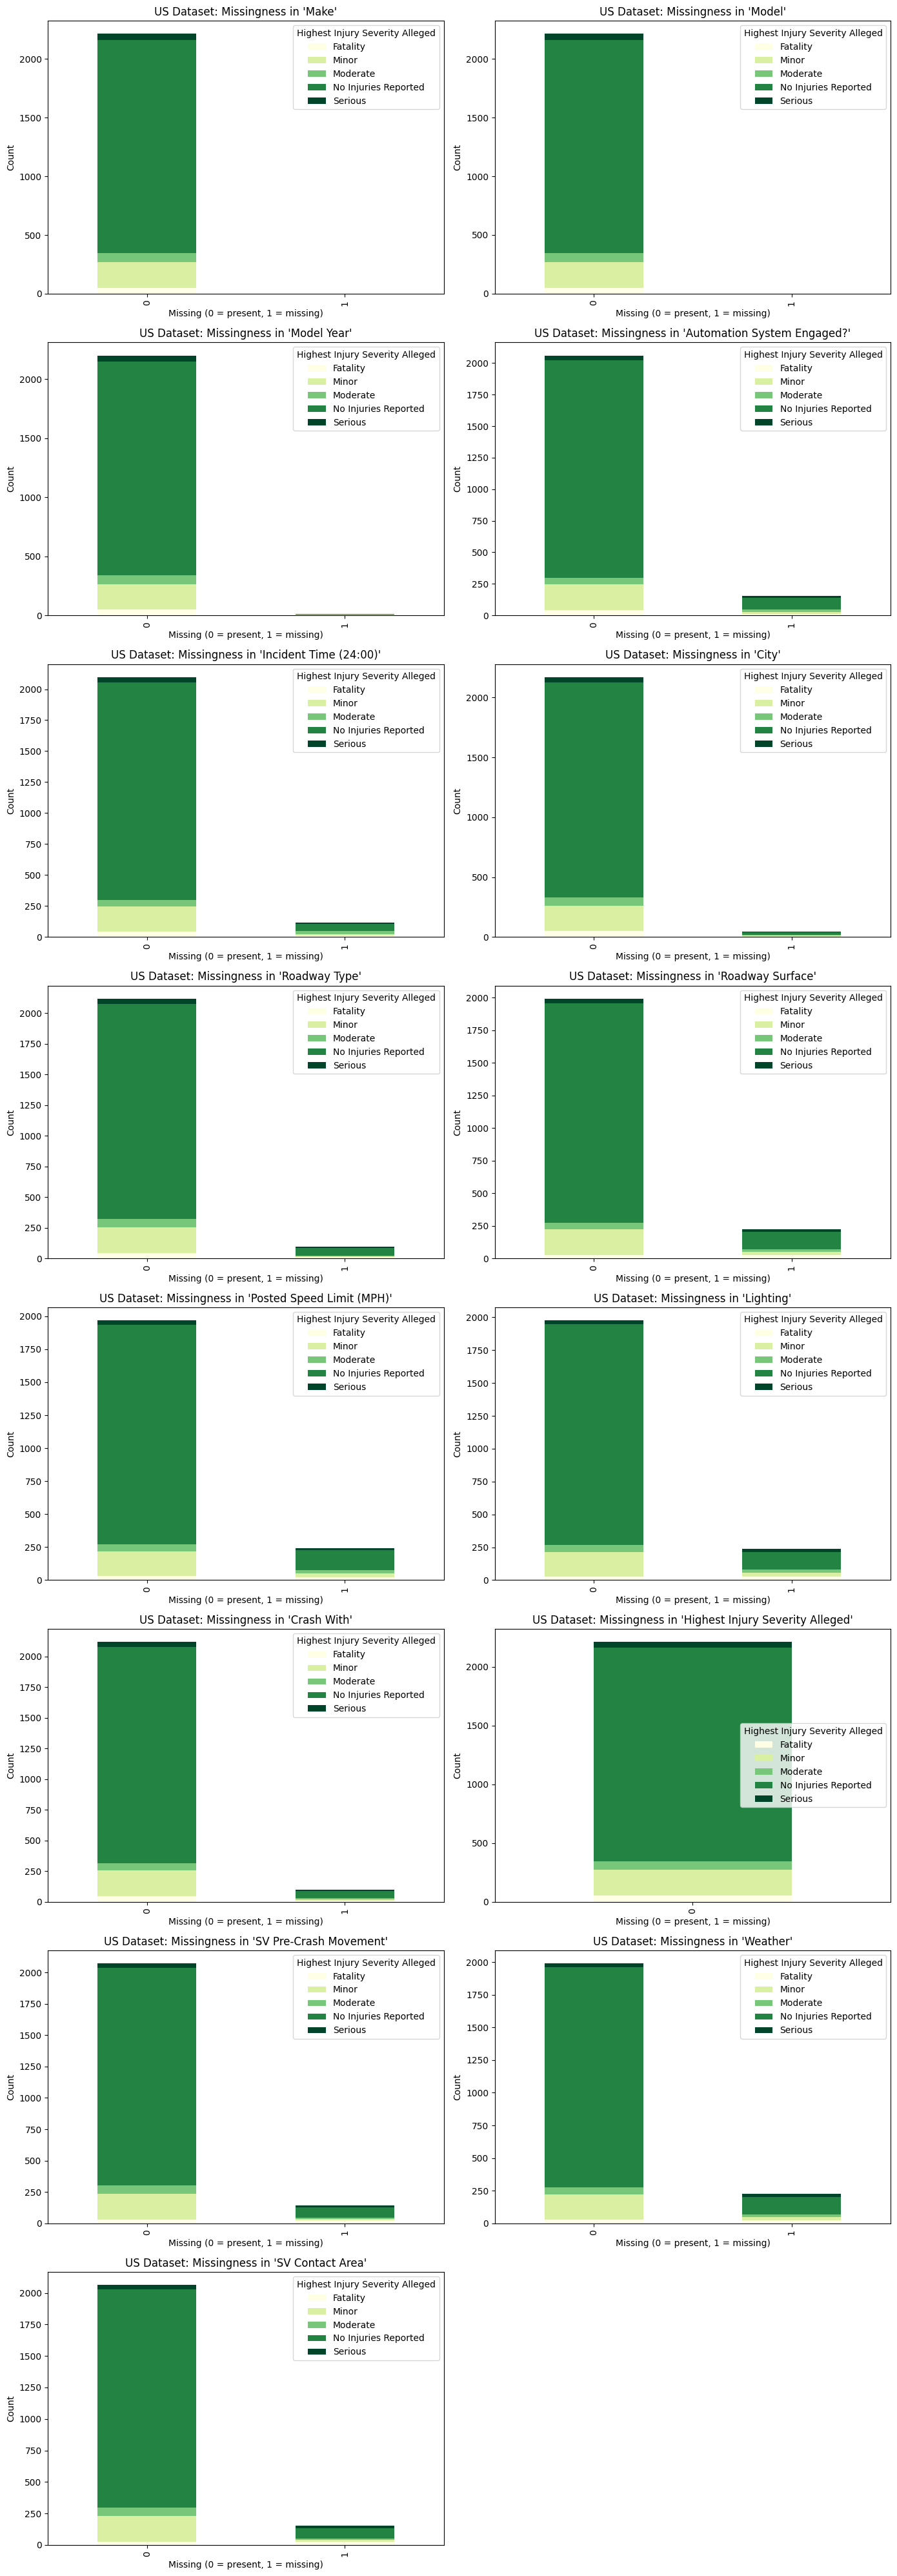

In [8]:

def plot_missing_correlation(dataset, dataset_name, target_variable, color_map):
    """
    Purpose: Label data points as 0 and -1 for missing 
    Plot these as a stacked bar chart with target variable on the severity
    Reference:
    - Plots together 2x2 https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
    """
    # practicing list comprehensions
    features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0]
    num_features = len(features_with_na)

    # Plotting the graphs together in one figure
    cols = 2
    rows = (num_features + cols - 1) // cols  # Ensure all plots fit
    fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5))
    axes = axes.flatten()

    # for each missing feature, create a new column indicating missingness
    for i, feature in enumerate(features_with_na):
        data = dataset.copy()
        data[feature + "_missing"] = np.where(data[feature].isnull(), 1, 0)
        grouped = data.groupby([feature + "_missing", target_variable]).size().unstack(fill_value=0)

        # Plot stacked bar chart
        grouped.plot(kind='bar', stacked=True, ax=axes[i], colormap=color_map)
        axes[i].set_title(f"{dataset_name}: Missingness in '{feature}'")
        axes[i].set_xlabel("Missing (0 = present, 1 = missing)")
        axes[i].set_ylabel("Count")

    # Remove unused axes for grids
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_missing_correlation(US_data, "US Dataset", "Highest Injury Severity Alleged", color_map="YlGn")

## **<span style="color:white;">Section 3: EDA for Numerical Values</span>**

**Boxplot For Numerical Columns**
- some model year is in the future but that is fine as 2026 vehicles are deployed in feburary 2026
- also there are some vehicles which as 70 years old on the road

UK model year outliers:
455

US model year outliers:
22


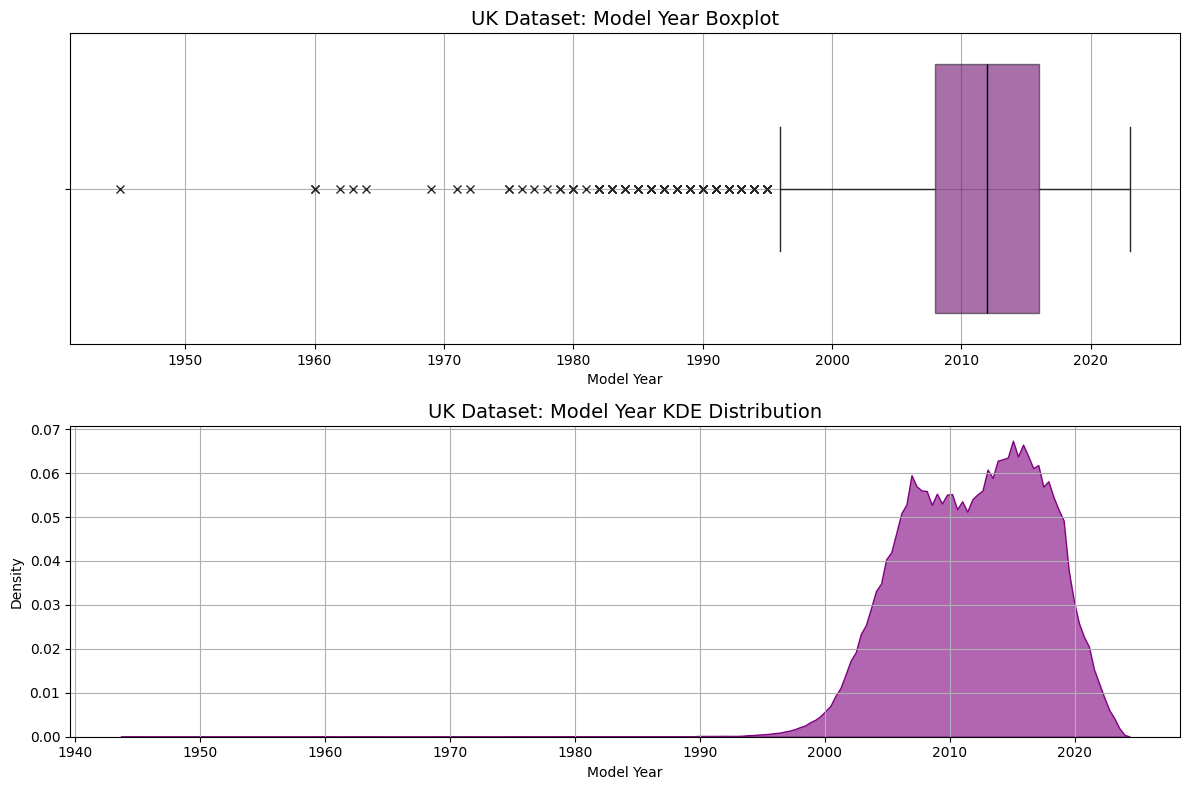

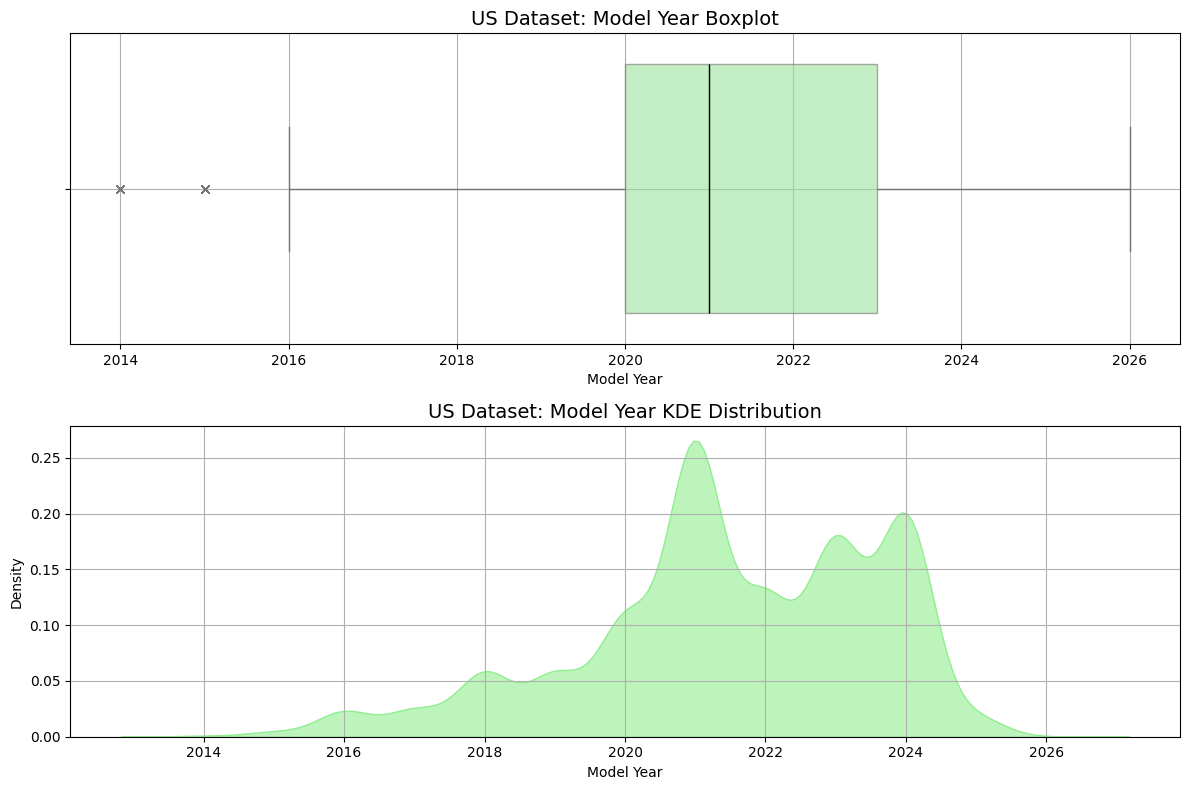

/var/folders/0k/whv99z5n5rnb1xp8n07krpcw0000gn/T/ipykernel_5292/1883481636.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Region', y=column,


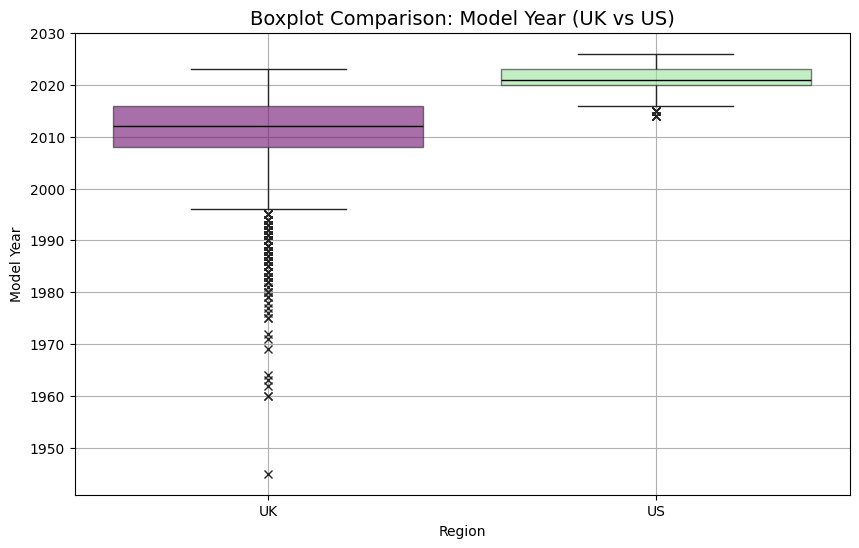

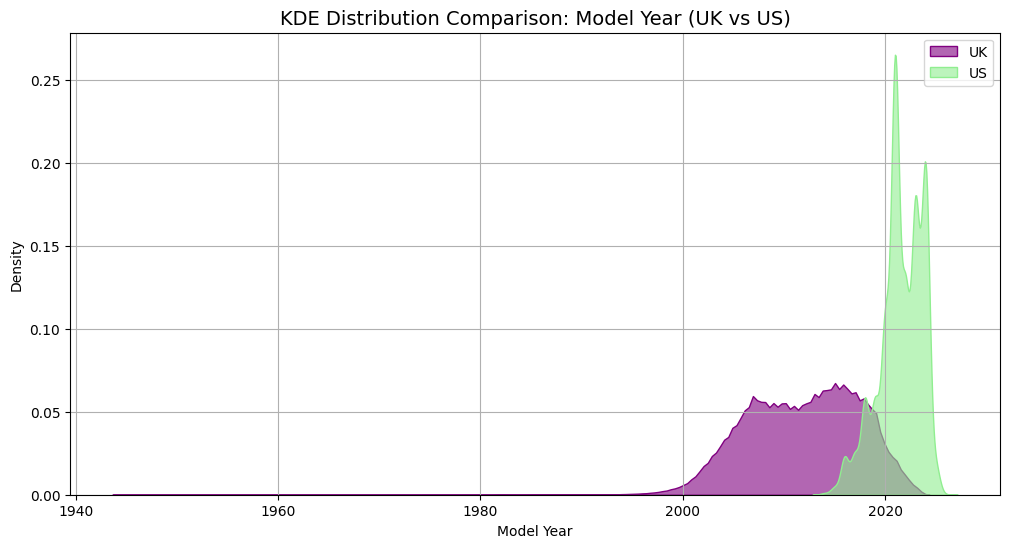

In [9]:
def preprocess_numeric_column(df, column_name):
    """Ensure the column is numeric and drop missing values."""
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    df = df.dropna(subset=[column_name])
    return df

def detect_outliers_iqr(df, column_name):
    """Detect outliers using the IQR method."""
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

def plot_boxplot_and_kde(data, column, region, color):
    """Plot both boxplot and KDE for a given region and column."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Boxplot
    sns.boxplot(x=data[column], color=color, flierprops=dict(marker='x', markersize=6),
                boxprops=dict(alpha=0.6), medianprops=dict(color='black'), ax=ax1)
    ax1.set_title(f"{region} Dataset: {column} Boxplot", fontsize=14)
    ax1.set_xlabel(column)
    ax1.grid(True)
    
    # KDE plot only (no histogram)
    sns.kdeplot(data[column], color=color, fill=True, alpha=0.6, ax=ax2)
    ax2.set_title(f"{region} Dataset: {column} KDE Distribution", fontsize=14)
    ax2.set_xlabel(column)
    ax2.set_ylabel("Density")
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_combined_kde(uk_data, us_data, column):
    """Plot KDE comparison for both regions on the same plot.
    Refeference:
    - KDE Overlap https://medium.com/@HalderNilimesh/mastering-multi-distribution-kde-plots-in-seaborn-a-complete-guide-to-overlapping-density-plots-b01dc3a3bdd2
    """
    plt.figure(figsize=(12, 6))
    
    # Plot KDE for both datasets (no histograms)
    sns.kdeplot(uk_data[column], color='purple', fill=True, alpha=0.6, label='UK')
    sns.kdeplot(us_data[column], color='lightgreen', fill=True, alpha=0.6, label='US')
    plt.title(f"KDE Distribution Comparison: {column} (UK vs US)", fontsize=14)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_combined_boxplot(uk_data, us_data, column):
    """Plot boxplot comparison for both regions on the same plot."""
    # Prepare data for comparison
    uk_subset = uk_data[[column]].copy()
    uk_subset['Region'] = 'UK'
    us_subset = us_data[[column]].copy()
    us_subset['Region'] = 'US'
    
    combined_data = pd.concat([uk_subset, us_subset], ignore_index=True)
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_data, x='Region', y=column, 
                palette={'UK': 'purple', 'US': 'lightgreen'},
                flierprops=dict(marker='x', markersize=6),
                boxprops=dict(alpha=0.6), 
                medianprops=dict(color='black'))
    
    plt.title(f"Boxplot Comparison: {column} (UK vs US)", fontsize=14)
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

# Preprocess data
UK_data = preprocess_numeric_column(UK_data, "Model Year")
uk_outliers_year = detect_outliers_iqr(UK_data, "Model Year")
print("UK model year outliers:")
print(len(UK_data[uk_outliers_year])) # how many outliers in UK data

US_data = preprocess_numeric_column(US_data, "Model Year")
us_outliers_year = detect_outliers_iqr(US_data, "Model Year")
print("\nUS model year outliers:")
print(len(US_data[us_outliers_year])) # how many outliers in US data

# Plot individual boxplots and KDE for each region
plot_boxplot_and_kde(UK_data, "Model Year", "UK", "purple")
plot_boxplot_and_kde(US_data, "Model Year", "US", "lightgreen")
plot_combined_boxplot(UK_data, US_data, "Model Year")
plot_combined_kde(UK_data, US_data, "Model Year")


## **<span style="color:white;">Section 4: EDA for Catergorical Values</span>**

**KDE and Histograms**
- Too many values taking more than 30mins for the UK dataset hence only plotting top 20 
- counter method for SV contact as multi answers

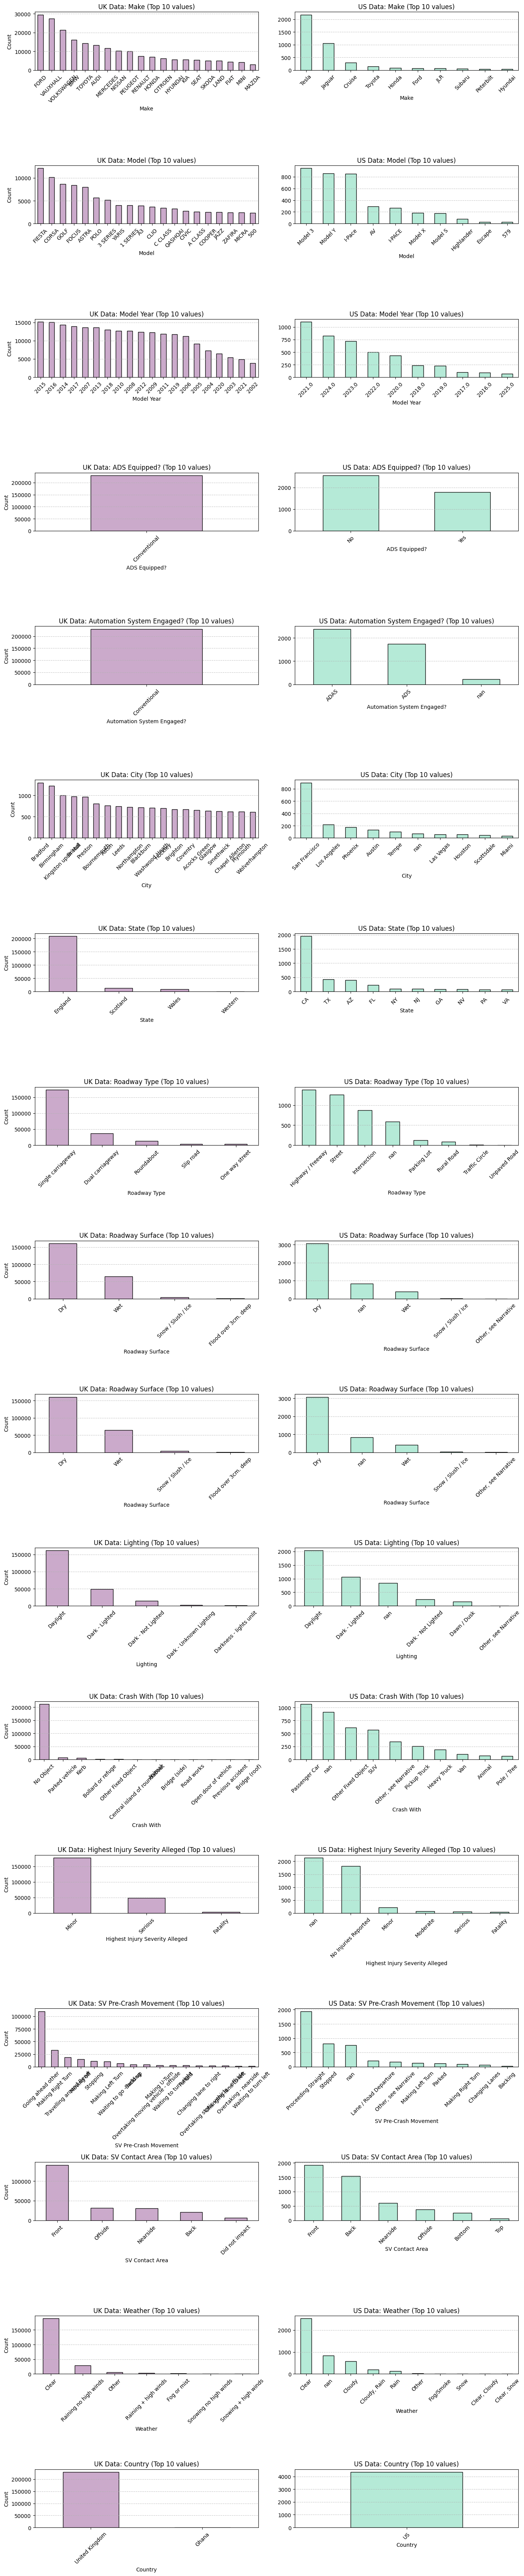

In [10]:
# subplots for to make plots together
fig, axes = plt.subplots(len(catergorical_columns), 2, figsize=(14, len(catergorical_columns)*4), sharey=False)
if len(catergorical_columns) == 1:
    axes = axes.reshape(1, 2)

# 
for idx, column in enumerate(catergorical_columns):
    if column not in UK_data.columns:
        print(f"Warning: '{column}' not in UK data columns. Skipping.")
        continue
    if column not in US_data.columns:
        print(f"Warning: '{column}' not in US data columns. Skipping.")
        continue
    
    # UK Data bar plot - top 20 values
    uk_counts = UK_data[column].value_counts(dropna=False).head(20)
    uk_counts.plot(kind='bar', ax=axes[idx, 0], color='#CBAACB',edgecolor='black')  # pastel purple
    axes[idx, 0].set_title(f'UK Data: {column} (Top 10 values)')
    axes[idx, 0].set_xlabel(column)
    axes[idx, 0].set_ylabel('Count')
    axes[idx, 0].tick_params(axis='x', rotation=45)
    axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # US Data bar plot - top 20 values
    if column == 'SV Contact Area':
        area_series = US_data[column].dropna()
        all_areas = []
        for val in area_series:
            parts = [part.strip() for part in val.split(',')]
            all_areas.extend(parts)
        area_counts = Counter(all_areas)
        area_counts_df = pd.Series(area_counts).sort_values(ascending=False).head(10)
        area_counts_df.plot(kind='bar', ax=axes[idx, 1], color='#B5EAD7',edgecolor='black')  # pastel green
    else:
        us_counts = US_data[column].value_counts(dropna=False).head(10)
        us_counts.plot(kind='bar', ax=axes[idx, 1], color='#B5EAD7',edgecolor='black')  # pastel green

    axes[idx, 1].set_title(f'US Data: {column} (Top 10 values)')
    axes[idx, 1].set_xlabel(column)
    axes[idx, 1].tick_params(axis='x', rotation=45)
    axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## **<span style="color:white;">Section 5: EDA for Datetime Values</span>**

**Radial Time Plot Data**

/var/folders/0k/whv99z5n5rnb1xp8n07krpcw0000gn/T/ipykernel_5292/1429270294.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Incident Time (24:00)'] = pd.to_datetime(df['Incident Time (24:00)'], errors='coerce').dt.hour
/var/folders/0k/whv99z5n5rnb1xp8n07krpcw0000gn/T/ipykernel_5292/1429270294.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Incident Time (24:00)'] = pd.to_datetime(df['Incident Time (24:00)'], errors='coerce').dt.hour


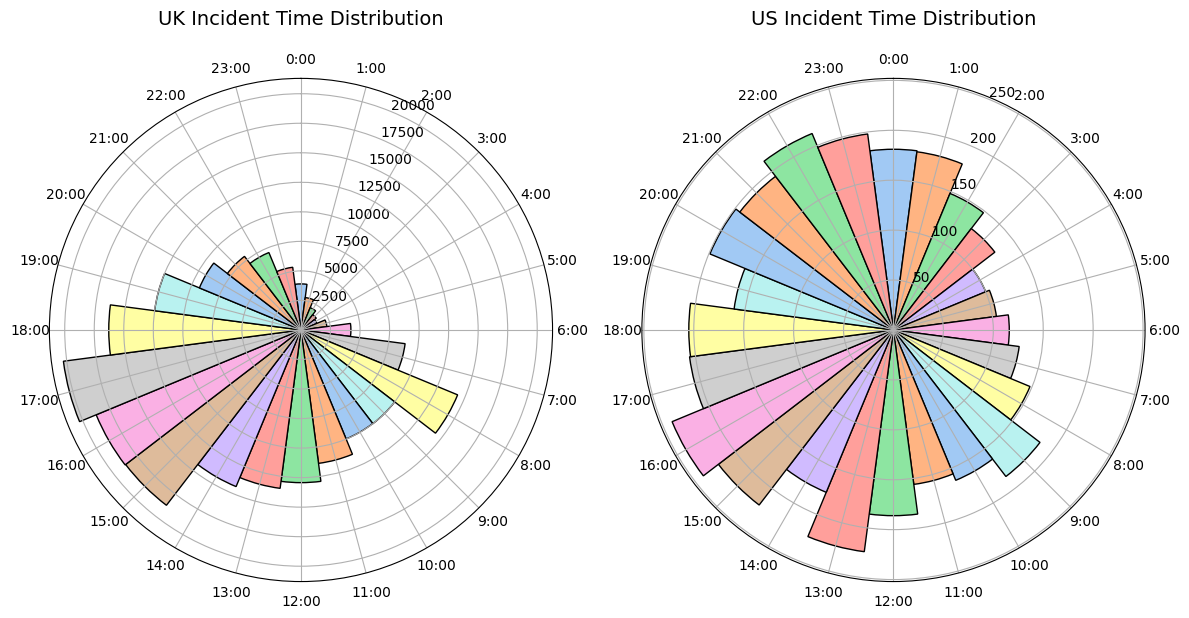

In [11]:
def plot_incident_time_radial_side_by_side(UK_data, US_data):
    """
    Purpose: Plot radial bar charts for incident time distribution side by side for UK and US datasets.
    Reference:
    - radial plots https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html
    - how to check if datetime  https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_datetime64_any_dtype.html
    - ploting the hours equally https://numpy.org/devdocs/reference/generated/numpy.linspace.html
    """
    for df in [UK_data, US_data]:     # Make sure Incident Time is datetime or extract hour as integer
        if 'Incident Time (24:00)' in df.columns:             # Try to convert to datetime, extract hour
            if not pd.api.types.is_datetime64_any_dtype(df['Incident Time (24:00)']): # Check if column is datetime
                df['Incident Time (24:00)'] = pd.to_datetime(df['Incident Time (24:00)'], errors='coerce').dt.hour
            else:
                df['Incident Time (24:00)'] = df['Incident Time (24:00)'].dt.hour

    # Prepare counts of hours 0-23 = 24hrs
    uk_hours = UK_data['Incident Time (24:00)'].dropna().astype(int)
    uk_counts = uk_hours.value_counts().reindex(range(24), fill_value=0).sort_index()
    us_hours = US_data['Incident Time (24:00)'].dropna().astype(int)
    us_counts = us_hours.value_counts().reindex(range(24), fill_value=0).sort_index()
    hours = range(24)
    theta = np.linspace(0.0, 2 * np.pi, 24, endpoint=False) # spacing angles evenly
    width = 2 * np.pi / 24

    fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': 'polar'})
    colors = sns.color_palette('pastel', 24)

    # UK plot
    axes[0].bar(theta, uk_counts, width=width, bottom=0.0, color=colors, edgecolor='black')
    axes[0].set_theta_zero_location("N")
    axes[0].set_theta_direction(-1)
    axes[0].set_xticks(theta)
    axes[0].set_xticklabels([f'{h}:00' for h in hours])
    axes[0].set_title('UK Incident Time Distribution', fontsize=14, pad=20)

    # US plot
    axes[1].bar(theta, us_counts, width=width, bottom=0.0, color=colors, edgecolor='black')
    axes[1].set_theta_zero_location("N")
    axes[1].set_theta_direction(-1)
    axes[1].set_xticks(theta)
    axes[1].set_xticklabels([f'{h}:00' for h in hours])
    axes[1].set_title('US Incident Time Distribution', fontsize=14, pad=20)

    plt.tight_layout()
    plt.show()

plot_incident_time_radial_side_by_side(UK_data, US_data)

**Day, Months, Year Distrubtion**

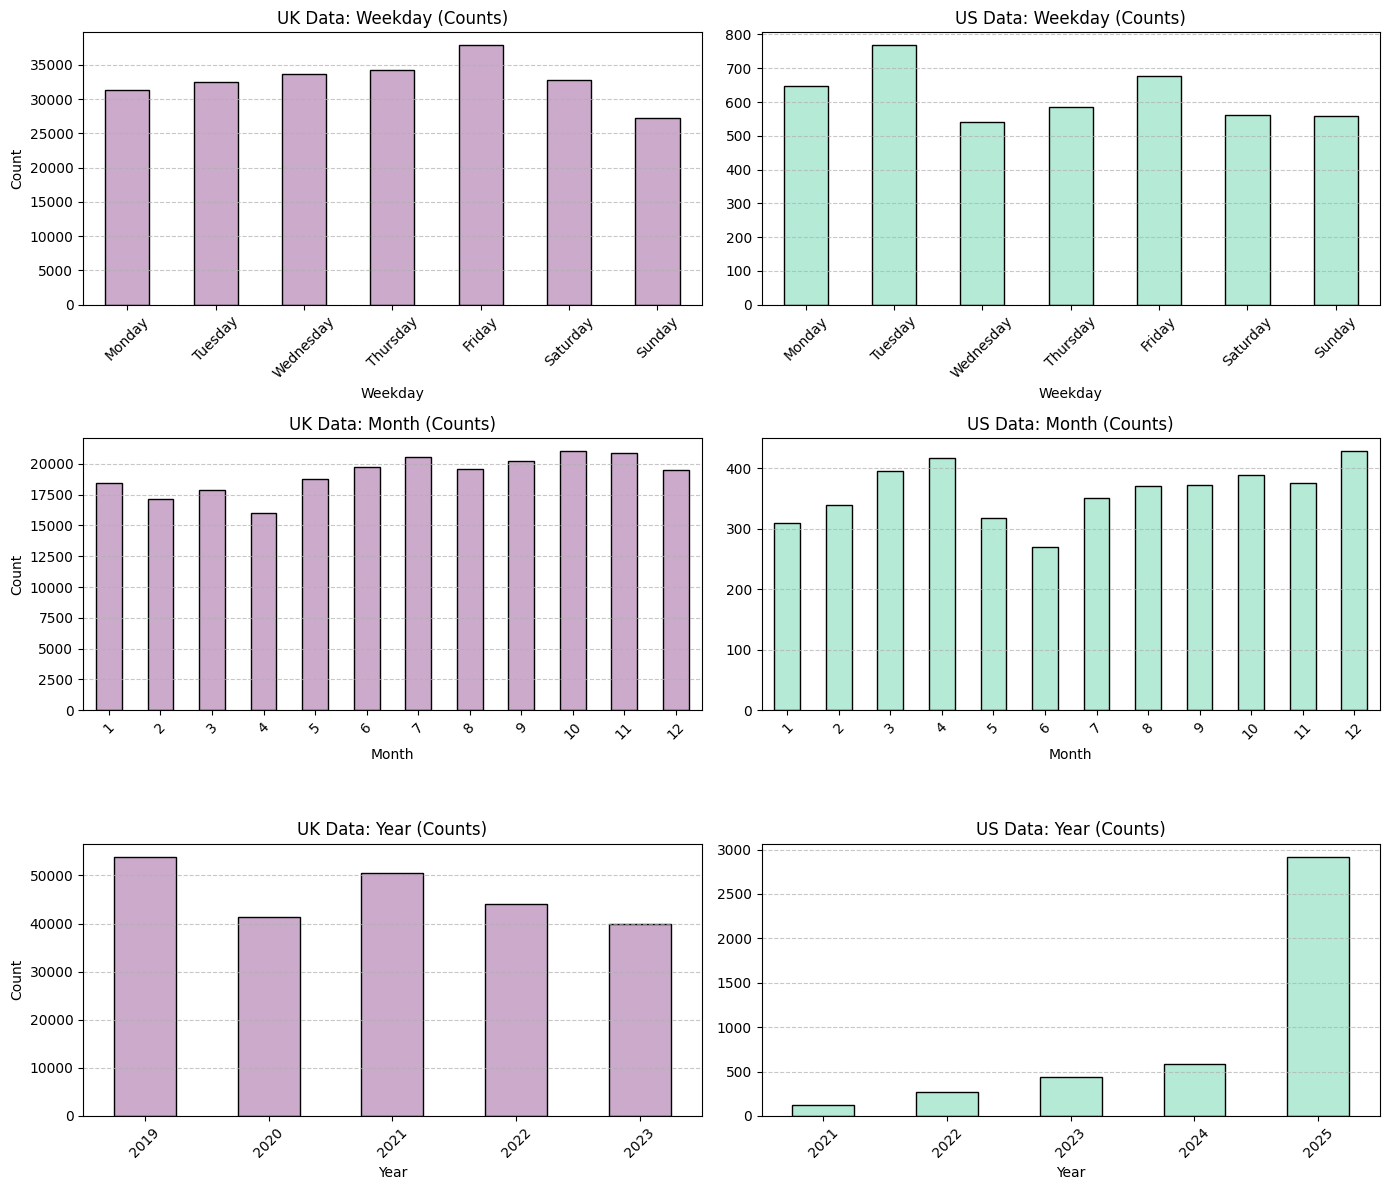

In [12]:
def plot_weekday_month_year_side_by_side(UK_data, US_data):
    """
    Purpose: Plot weekday, month, and year distributions side by side for UK and US datasets.
    Reference:
    - how to check if datetime  https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_datetime64_any_dtype.html
    """
    # Convert Incident Date to datetime if needed
    for df in [UK_data, US_data]:
        if 'Incident Date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Incident Date']):
            df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')

        # Extract weekday name which is not in the columns
        if 'Weekday' not in df.columns:
            df['Weekday'] = df['Incident Date'].dt.day_name()
        # Extract month and year as before
        if 'Month' not in df.columns:
            df['Month'] = df['Incident Date'].dt.month
        if 'Year' not in df.columns:
            df['Year'] = df['Incident Date'].dt.year
    time_columns = ['Weekday', 'Month', 'Year']
    # Create subplots for each time column
    fig, axes = plt.subplots(len(time_columns), 2, figsize=(14, len(time_columns)*4), sharey=False)
    if len(time_columns) == 1:
        axes = axes.reshape(1, 2)

    for idx, column in enumerate(time_columns):
        # UK plot
        uk_counts = UK_data[column].value_counts(dropna=False)
        if column == 'Weekday':
            # Reorder weekdays to be in order 
            weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            uk_counts = uk_counts.reindex(weekdays_order).fillna(0)
        else:
            uk_counts = uk_counts.sort_index()

        uk_counts.plot(kind='bar', ax=axes[idx, 0], color='#CBAACB',edgecolor='black')
        axes[idx, 0].set_title(f'UK Data: {column} (Counts)')
        axes[idx, 0].set_xlabel(column)
        axes[idx, 0].set_ylabel('Count')
        axes[idx, 0].tick_params(axis='x', rotation=45)
        axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.7)

        # US plot
        us_counts = US_data[column].value_counts(dropna=False)
        if column == 'Weekday':
            us_counts = us_counts.reindex(weekdays_order).fillna(0)
        else:
            us_counts = us_counts.sort_index()

        us_counts.plot(kind='bar', ax=axes[idx, 1], color='#B5EAD7',edgecolor='black')
        axes[idx, 1].set_title(f'US Data: {column} (Counts)')
        axes[idx, 1].set_xlabel(column)
        axes[idx, 1].tick_params(axis='x', rotation=45)
        axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
plot_weekday_month_year_side_by_side(UK_data, US_data)


## **<span style="color:white;">Section 6: Geospartial Analysis</span>**

**UK Maps**

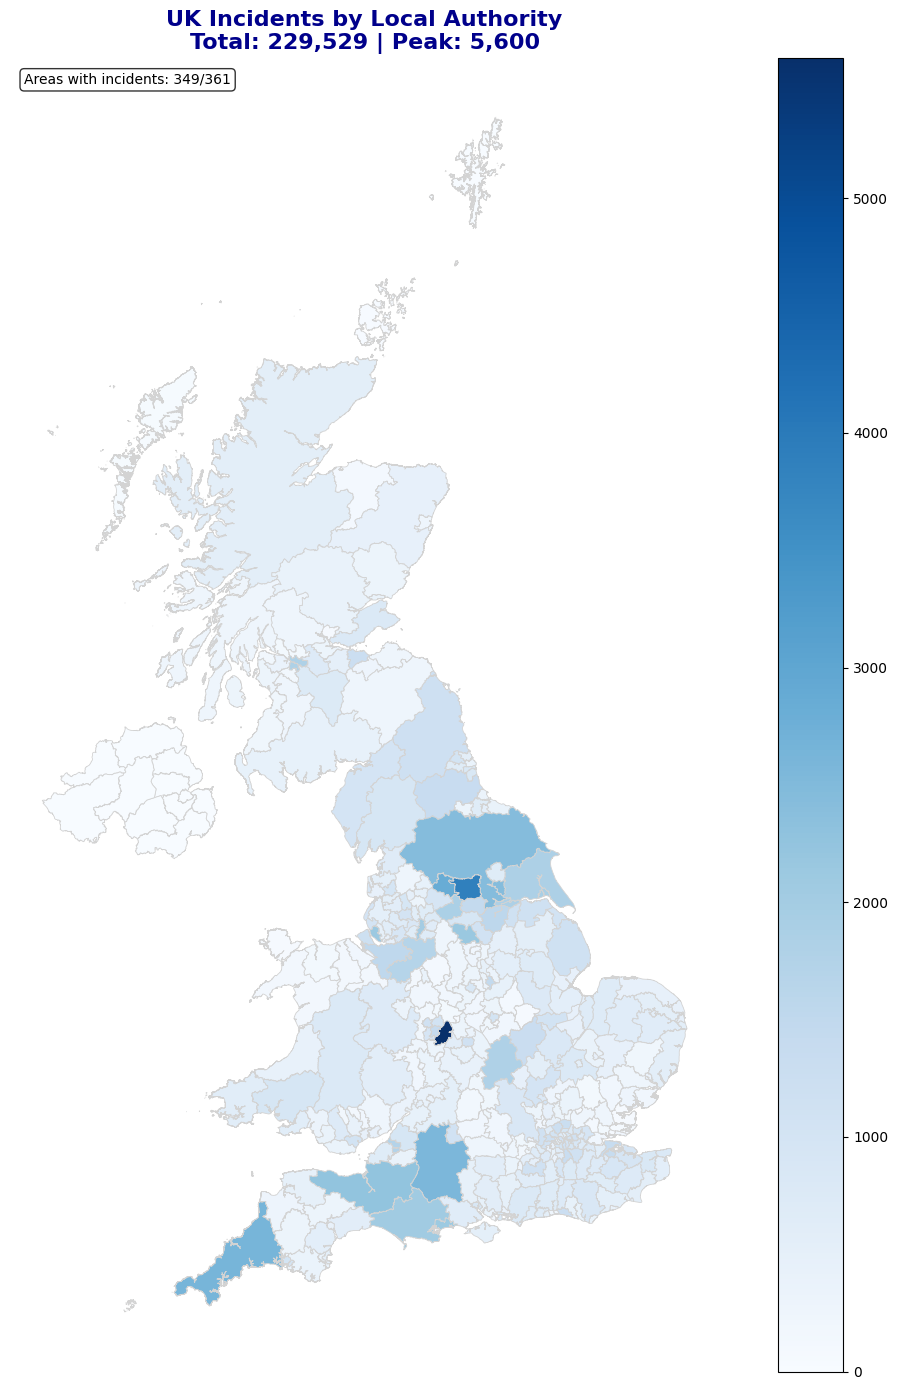

Matched: 229,529 | Unmatched: 175

Top 5 Areas:
1. Birmingham: 5600 incidents
2. Leeds: 3880 incidents
3. Bradford: 2848 incidents
4. Cornwall: 2632 incidents
5. Wiltshire: 2562 incidents

LADs with zero incidents:
['Antrim and Newtownabbey', 'Armagh City, Banbridge and Craigavon', 'Belfast', 'Causeway Coast and Glens', 'Derry City and Strabane', 'Fermanagh and Omagh', 'Lisburn and Castlereagh', 'Mid and East Antrim', 'Mid Ulster', 'Newry, Mourne and Down', 'Ards and North Down', 'Shetland Islands']
Number of unmatched points: 175

Longitude and Latitude of unmatched points:
        longitude   latitude
1096    -0.126714  51.487501
3426    -0.126250  51.487224
3987    -0.048494  51.506171
4748    -0.001675  51.505193
5744    -2.720921  53.756618
...           ...        ...
227285  -4.079944  51.662468
227882  -4.085060  52.411346
228101  -4.934883  51.708958
228678  -4.574406  55.959513
229537  -4.270326  55.855820

[175 rows x 2 columns]


In [13]:
"""
Purpose: Create a choropleth map of UK incidents by Local Authority District (LAD).
Reference:
- downloading shapefile with the LADS and mapping long and lat https://geoportal.statistics.gov.uk
- example usage https://github.com/martinjc/UK-GeoJSON
- figuring out the join https://stackoverflow.com/questions/68504942/how-do-geopandas-sjoin-predicate-within-and-intersects-differ
"""

# Convert UK_data to GeoDataFrame with points
geometry = [Point(xy) for xy in zip(UK_data['longitude'], UK_data['latitude'])]
gdf_points = gpd.GeoDataFrame(UK_data, geometry=geometry, crs="EPSG:4326")

# Remove impossible longitude/latitude (UK bounds: lat 49.5-60, lon -8 to 2)
gdf_points = gdf_points[(gdf_points['latitude'].between(49.5, 60)) &
                        (gdf_points['longitude'].between(-8, 2))]

# Load UK LAD shapefile
uk_shapefile_path = "/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Datasets/LAD_MAY_2025_UK_BFC_2360005762104150824"
uk_lads = gpd.read_file(uk_shapefile_path)

# Reproject points to match LAD CRS and spatial join within polygons
gdf_points = gdf_points.to_crs(uk_lads.crs)
gdf_joined = gpd.sjoin(gdf_points, uk_lads, how="left", predicate="within")

# Count incidents per LAD
lad_counts = gdf_joined.groupby('LAD25NM').size().reset_index(name='incident_count')

# Merge counts with LAD GeoDataFrame
choropleth_gdf = uk_lads.merge(lad_counts, how='left', on='LAD25NM')
choropleth_gdf['incident_count'] = choropleth_gdf['incident_count'].fillna(0)

# Enhanced plot with blue theme
fig, ax = plt.subplots(figsize=(12, 14))
choropleth_gdf.plot(column='incident_count',
                    cmap='Blues',
                    linewidth=0.6,
                    ax=ax,
                    edgecolor='lightgrey',
                    legend=True)

# Add title with stats
total = int(choropleth_gdf['incident_count'].sum())
max_count = int(choropleth_gdf['incident_count'].max())
plt.title(f'UK Incidents by Local Authority\nTotal: {total:,} | Peak: {max_count:,}', 
          fontsize=16, fontweight='bold', color='darkblue')

# Add stats box with blue theme
stats = f"Areas with incidents: {len(choropleth_gdf[choropleth_gdf['incident_count'] > 0])}/{len(choropleth_gdf)}"
ax.text(0.02, 0.98, stats, transform=ax.transAxes, fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='black'))

plt.axis('off') # Hide axes
plt.tight_layout()
plt.savefig("/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/<Jupiter Notebooks>/EDA_FE/UK_incidents_choropleth.png", dpi=300, bbox_inches='tight')
plt.show()

# How many matched and unmatched areas
matched = gdf_joined['LAD25NM'].notna().sum()
unmatched = gdf_joined['LAD25NM'].isna().sum()
print(f"Matched: {matched:,} | Unmatched: {unmatched:,}")

# Top 5 areas
top5 = choropleth_gdf.nlargest(5, 'incident_count')[['LAD25NM', 'incident_count']]
print("\nTop 5 Areas:")
for i, (_, row) in enumerate(top5.iterrows(), 1):
    print(f"{i}. {row['LAD25NM']}: {int(row['incident_count'])} incidents")

# Identify 11 LADs with zero incidents
zero_incidents = choropleth_gdf[choropleth_gdf['incident_count'] == 0]
print("\nLADs with zero incidents:")
print(zero_incidents['LAD25NM'].tolist())

# Number of unmatched points and their coordinates
unmatched_points = gdf_joined[gdf_joined['LAD25NM'].isna()]
print(f"Number of unmatched points: {len(unmatched_points)}")
print("\nLongitude and Latitude of unmatched points:")
print(unmatched_points[['longitude', 'latitude']])



**US Data**

In [14]:
def plot_us_state_choropleth(US_data):
    """
    Purpose: Create a choropleth map of US incidents by state.
    Reference: https://plotly.com/python/county-choropleth/
    """
    
    # Clean 'State' column: remove whitespace, uppercase
    US_data['State'] = US_data['State'].astype(str).str.strip().str.upper()
    
    # Count occurrences per state
    state_counts = US_data['State'].value_counts().reset_index()
    state_counts.columns = ['State', 'Count']
    # Calculate stats annotation
    total_incidents = state_counts['Count'].sum()
    max_count = state_counts['Count'].max()
    states_with_data = len(state_counts)
    
    # Create choropleth map with enhanced title
    fig = px.choropleth(
        state_counts,
        locations='State',
        locationmode='USA-states',
        color='Count',
        color_continuous_scale='Blues',
        scope='usa',
        title=f'US Incidents by State<br>Total: {total_incidents:,} | Peak: {max_count:,}'
    )

    fig.show()
    
    # Top 5 states
    print(f"Top 5 States:")
    top_5 = state_counts.head(5)
    for i, (_, row) in enumerate(top_5.iterrows(), 1):
        print(f"{i}. {row['State']}: {row['Count']} incidents")

plot_us_state_choropleth(US_data)

Top 5 States:
1. CA: 1952 incidents
2. TX: 432 incidents
3. AZ: 405 incidents
4. FL: 226 incidents
5. NY: 98 incidents


In [15]:
def plot_california_cities(US_data):
    """
    Purpose: Create a bar chart of the top 10 cities in California by incident count.
    Reference:
    - filtering and counting cities https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing
    """
    # Filter for California and count cities
    ca_data = US_data[US_data['State'].str.strip().str.upper() == 'CA']
    city_counts = ca_data['City'].value_counts().head(15).reset_index()
    city_counts.columns = ['City', 'Count']
    total_cities = len(ca_data['City'].value_counts())
    peak_count = city_counts['Count'].max()
    
    # Simple bar chart with stats in title
    fig = px.bar(city_counts, x='City', y='Count', 
                 color='Count', color_continuous_scale='Blues',
                 title=f'Top 10 California Cities | Cities: {total_cities} | Peak: {peak_count}')
    
    fig.show()

plot_california_cities(US_data)

## **<span style="color:white;">Section 7: Severity Analysis</span>**

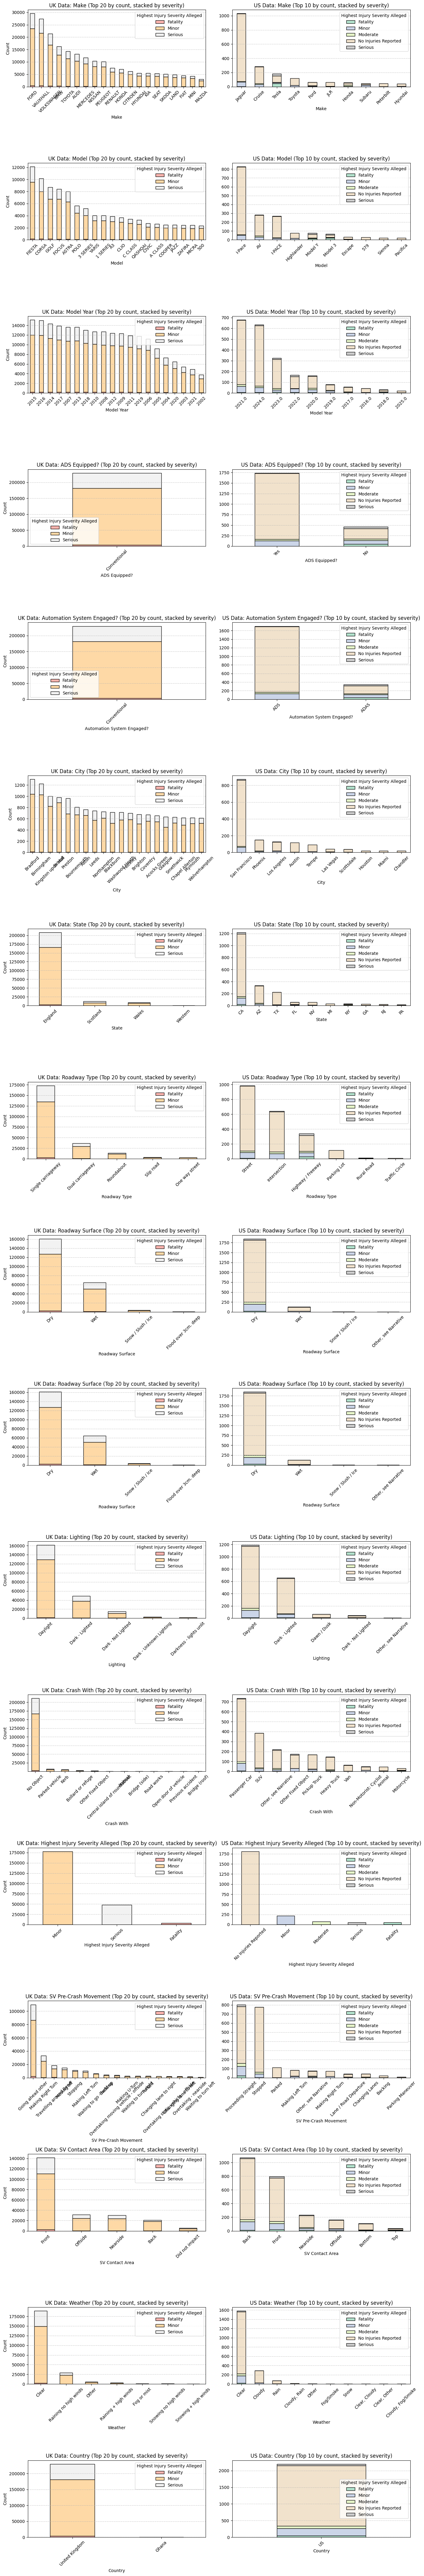

In [16]:
"""
Purpose: Create side-by-side bar plots for categorical columns in both datasets.
Reference: 
- grid subplot https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo
- Handling multiple values in contact area https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
"""

severity_col = 'Highest Injury Severity Alleged'  # update if different
fig, axes = plt.subplots(len(catergorical_columns), 2, figsize=(14, len(catergorical_columns)*5), sharey=False)
# Check if we have only one categorical column
if len(catergorical_columns) == 1:
    axes = axes.reshape(1, 2)

# Ensure all categorical columns are present in both datasets
for idx, column in enumerate(catergorical_columns):
    if column not in UK_data.columns:
        print(f"Warning: '{column}' not in UK data columns. Skipping.")
        continue
    if column not in US_data.columns:
        print(f"Warning: '{column}' not in US data columns. Skipping.")
        continue
    if severity_col not in UK_data.columns or severity_col not in US_data.columns:
        print(f"Warning: Severity column '{severity_col}' missing in data. Skipping.")
        continue

    # UK Data: Group by category and severity, count occurrences
    uk_grouped = UK_data.groupby([column, severity_col]).size().unstack(fill_value=0)

    # Limit to top 20 categories by total counts
    uk_totals = uk_grouped.sum(axis=1)
    uk_top_categories = uk_totals.sort_values(ascending=False).head(20).index
    uk_grouped_top = uk_grouped.loc[uk_top_categories]
    uk_grouped_top.plot(kind='bar', stacked=True, ax=axes[idx, 0], colormap='Pastel1', edgecolor='black')
    axes[idx, 0].set_title(f'UK Data: {column} (Top 20 by count, stacked by severity)')
    axes[idx, 0].set_xlabel(column)
    axes[idx, 0].set_ylabel('Count')
    axes[idx, 0].tick_params(axis='x', rotation=45)
    axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # US Data: Special case for 'SV Contact Area' as it contains comma-separated values hence 
    # needs to be exploded and then count how many times eg: can have front + back + left in same cell
    if column == 'SV Contact Area':
        # Explode comma separated areas
        all_rows = []
        for _, row in US_data[[column, severity_col]].dropna().iterrows():
            areas = [area.strip() for area in row[column].split(',')]
            for area in areas:
                all_rows.append({'Area': area, severity_col: row[severity_col]})
        us_expanded = pd.DataFrame(all_rows)
        us_grouped = us_expanded.groupby(['Area', severity_col]).size().unstack(fill_value=0)
        us_totals = us_grouped.sum(axis=1)
        us_top_areas = us_totals.sort_values(ascending=False).head(10).index
        us_grouped_top = us_grouped.loc[us_top_areas]
        us_grouped_top.plot(kind='bar', stacked=True, ax=axes[idx, 1], colormap='Pastel2', edgecolor='black')
    
    else: # Regular categorical column
        us_grouped = US_data.groupby([column, severity_col]).size().unstack(fill_value=0)
        us_totals = us_grouped.sum(axis=1)
        us_top_categories = us_totals.sort_values(ascending=False).head(10).index
        us_grouped_top = us_grouped.loc[us_top_categories]
        us_grouped_top.plot(kind='bar', stacked=True, ax=axes[idx, 1], colormap='Pastel2', edgecolor='black')
    # Set titles and labels for US plot
    axes[idx, 1].set_title(f'US Data: {column} (Top 10 by count, stacked by severity)')
    axes[idx, 1].set_xlabel(column)
    axes[idx, 1].tick_params(axis='x', rotation=45)
    axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()